In [5]:
import os 
import sys

%matplotlib inline
import matplotlib.pyplot as plt

from desilike.samples import Profiles, Chain, plotting

plt.style.use(os.path.join(os.path.abspath('../bin'), 'plot_style.mplstyle'))
plots_dir = '../../plots/'

In [2]:
tracer = 'ELG_LOPnotqso'
region = 'GCcomb'
zrange = (1.1, 1.6)
version = 'v4_1fixran'
data_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/{}'.format(version)
covtype = 'ezmocks'
template_name = 'shapefitqisoqap'
shotnoise = True

emulator_dir = os.path.join(data_dir, 'emulators/emulators_{}_{}'.format(template_name, tracer))
chains_dir = os.path.join(data_dir, 'chains', 'chains_{}_{{}}_z{:.3f}-z{:.3f}_{{}}_{}'.format(template_name, zrange[0], zrange[1], region), 'physicalpriorbasis')

chain_altmtl_thetacut = Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer, 'altmtl'), 'power_velocileptors_{}cov_thetacut0.05{}_{:d}.npy'.format(covtype, '_withshotnoise' if shotnoise else '', i))).remove_burnin(0.5)[::10] for i in range(8)])
chain_complete = Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer[:7], 'complete'), 'power_velocileptors_{}cov{}_{:d}.npy'.format(covtype, '_withshotnoise' if shotnoise else '', i))).remove_burnin(0.5)[::10] for i in range(8)])
chain_thetacut = Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer[:7], 'complete'), 'power_velocileptors_{}cov_thetacut0.05{}_{:d}.npy'.format(covtype, '_withshotnoise' if shotnoise else '', i))).remove_burnin(0.5)[::10] for i in range(8)])
chain_thetacut_sculptwindow = Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer[:7], 'complete'), 'power_velocileptors_{}cov_thetacut0.05_sculptwindow_centeredpriors1.0{}_{:d}.npy'.format(covtype, '_withshotnoise' if shotnoise else '', i))).remove_burnin(0.5)[::10] for i in range(8)])

chain_thetacut_ktmax04 = Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer[:7], 'complete'), 'power_velocileptors_{}cov_thetacut0.05_ktmax0.4_withshotnoise_{:d}.npy'.format(covtype, i))).remove_burnin(0.5)[::10] for i in range(8)])
chain_thetacut_sculptwindow_ktmax04 = Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer[:7], 'complete'), 'power_velocileptors_{}cov_thetacut0.05_sculptwindow_centeredpriors1.0_ktmax0.4_withshotnoise_{:d}.npy'.format(covtype, i))).remove_burnin(0.5)[::10] for i in range(8)])

chain_thetacut_ktmax045 = Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer[:7], 'complete'), 'power_velocileptors_{}cov_thetacut0.05_ktmax0.45_withshotnoise_{:d}.npy'.format(covtype, i))).remove_burnin(0.5)[::10] for i in range(8)])
chain_thetacut_sculptwindow_ktmax045 = Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer[:7], 'complete'), 'power_velocileptors_{}cov_thetacut0.05_sculptwindow_centeredpriors1.0_ktmax0.45_withshotnoise_{:d}.npy'.format(covtype, i))).remove_burnin(0.5)[::10] for i in range(8)])

chain_thetacut_ktmax05 = Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer[:7], 'complete'), 'power_velocileptors_{}cov_thetacut0.05_ktmax0.5_withshotnoise_{:d}.npy'.format(covtype, i))).remove_burnin(0.5)[::10] for i in range(8)])
chain_thetacut_sculptwindow_ktmax05 = Chain.concatenate([Chain.load(os.path.join(chains_dir.format(tracer[:7], 'complete'), 'power_velocileptors_{}cov_thetacut0.05_sculptwindow_centeredpriors1.0_ktmax0.5_withshotnoise_{:d}.npy'.format(covtype, i))).remove_burnin(0.5)[::10] for i in range(8)])

In [3]:
from getdist import plots
g = plots.get_single_plotter(width_inch=6, scaling=False, ratio=1)
g.settings.axes_fontsize = 12
g.settings.axes_labelsize = 12
g.settings.alpha_factor_contour_lines = 0

Removed no burn in
Removed no burn in


/tmp/ipykernel_733804/1367949025.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(plots_dir, version, 'corner_plot_power_rotation_{}_{}_complete_thetacut0.05{}.png'.format(tracer, region, '_wihshotnoise' if shotnoise else '')), dpi=300)


<Figure size 600x600 with 0 Axes>

/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


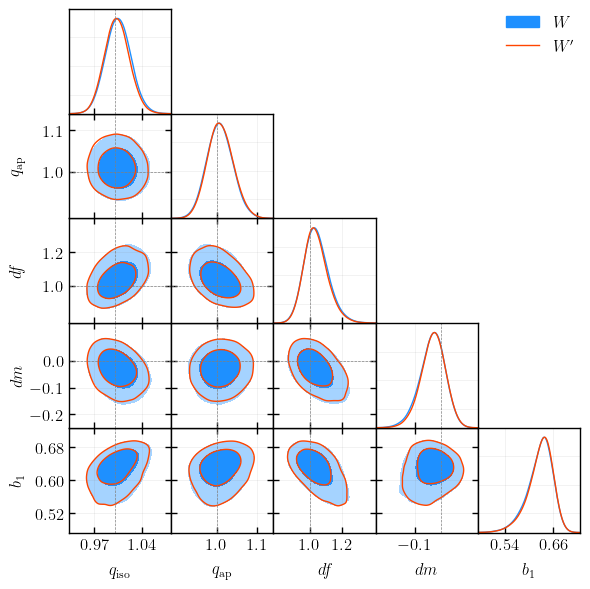

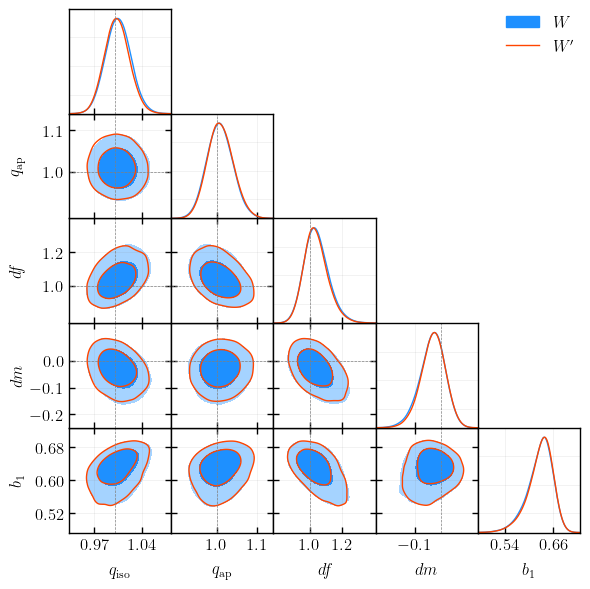

In [6]:
markers = {'qiso': 1., 'qap': 1., 'df': 1., 'dm': 0.}
params = ['qiso', 'qap', 'df', 'dm', 'b1p']
colors = ['dodgerblue', 'orangered']
plotting.plot_triangle([chain_thetacut, chain_thetacut_sculptwindow], labels=[r'$W$', '$W^{\prime}$'], 
                       markers=markers, params=params,
                       g=g, lws=1., contour_lws=1., filled=[True, False], contour_ls=['-', '-'], colors=colors, contour_colors=colors,
                       legend_loc='upper right', 
                       show=False)
fig = plt.gcf()
fig.align_ylabels()
plt.savefig(os.path.join(plots_dir, version, 'corner_plot_power_rotation_{}_{}_complete_thetacut0.05{}.png'.format(tracer, region, '_wihshotnoise' if shotnoise else '')), dpi=300)
plt.show()

In [7]:
params = ['qiso', 'qap', 'dm', 'df', 'b1p', 'b2p', 'bsp', 'sn0p', 'sn2p', 'sn4p']

for iparam, param in enumerate(params):
    print(param)
    desi_y1_err = chain_altmtl_thetacut.std(param)
    print('Y1 error: ', desi_y1_err)
    bestfitdiff_thetacut = chain_thetacut.mean(param) - chain_complete.mean(param)
    bestfitdiff_sculptwindow = chain_thetacut_sculptwindow.mean(param) - chain_complete.mean(param)
    print('theta-cut - complete:', bestfitdiff_thetacut, '({:.3f}% of DR1 error)'.format(bestfitdiff_thetacut/desi_y1_err*100))
    print('rotated theta-cut - complete:', bestfitdiff_sculptwindow, '({:.3f}% of DR1 error)'.format(bestfitdiff_sculptwindow/desi_y1_err*100))

qiso
Y1 error:  0.017055119897485906
theta-cut - complete: 0.00019616229090280157 (1.150% of DR1 error)
rotated theta-cut - complete: -0.0016992661780697027 (-9.963% of DR1 error)
qap
Y1 error:  0.031190721145303357
theta-cut - complete: -5.188342851192296e-05 (-0.166% of DR1 error)
rotated theta-cut - complete: 0.001333781899410802 (4.276% of DR1 error)
dm
Y1 error:  0.0479267450757663
theta-cut - complete: 0.0017629410968980977 (3.678% of DR1 error)
rotated theta-cut - complete: 0.004540468073914273 (9.474% of DR1 error)
df
Y1 error:  0.07471433076239598
theta-cut - complete: 0.0019176736222119573 (2.567% of DR1 error)
rotated theta-cut - complete: -0.0009483887274119862 (-1.269% of DR1 error)
b1p
Y1 error:  0.031907283100042795
theta-cut - complete: -0.0005697429488857875 (-1.786% of DR1 error)
rotated theta-cut - complete: 0.0005215587830901258 (1.635% of DR1 error)
b2p
Y1 error:  0.35933370554449034
theta-cut - complete: -0.0068016683822119395 (-1.893% of DR1 error)
rotated theta-

In [8]:
cmap = plt.get_cmap('coolwarm', 4)
colors = [cmap(i) for i in range(4)]
params=['sn0p', 'sn2p', 'sn4p']
#params = ['alpha0p', 'alpha2p', 'alpha4p']
#params = ['qiso', 'qap', 'df', 'dm', 'b1p', 'b2p', 'bsp']
#params = ['qiso', 'qap', 'df', 'dm']
plotting.plot_triangle([chain_thetacut_sculptwindow, chain_thetacut_sculptwindow_ktmax04, chain_thetacut_sculptwindow_ktmax045, chain_thetacut_sculptwindow_ktmax05], labels=[r'$W^{\prime}, \;k_{\mathrm{t}}^{\mathrm{max}} = 0.35 \; h/\mathrm{Mpc}$', r'$W^{\prime}, \; k_{\mathrm{t}}^{\mathrm{max}} = 0.40 \; h/\mathrm{Mpc}$', r'$W^{\prime}, \; k_{\mathrm{t}}^{\mathrm{max}} = 0.45 \; h/\mathrm{Mpc}$', r'$W^{\prime}, \; k_{\mathrm{t}}^{\mathrm{max}} = 0.5 \; h/\mathrm{Mpc}$'], 
                       markers=markers, params=params,
                       g=g, lws=1., contour_lws=1., filled=False, contour_ls='-', colors=colors, contour_colors=colors,
                       legend_loc='upper right', 
                       show=False)
fig = plt.gcf()
fig.align_ylabels()
plt.show()

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


<Figure size 600x600 with 0 Axes>

/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


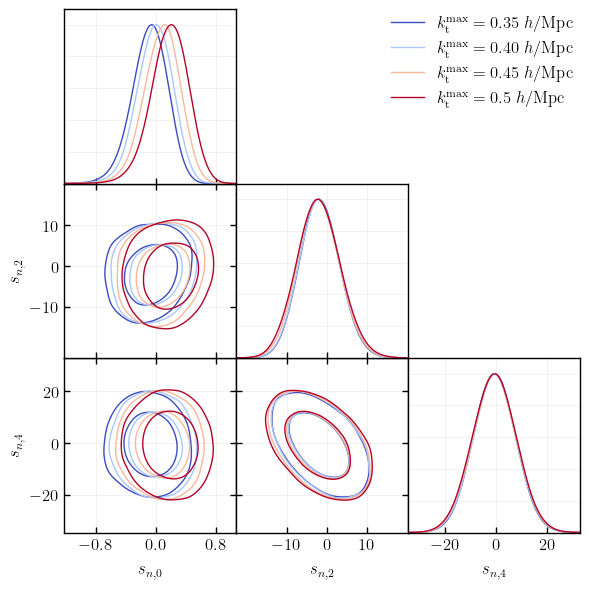

In [27]:
cmap = plt.get_cmap('coolwarm', 4)
colors = [cmap(i) for i in range(4)]
g = plots.get_single_plotter(width_inch=6, scaling=False, ratio=1)
g.settings.axes_fontsize = 12
g.settings.axes_labelsize = 12
g.settings.alpha_factor_contour_lines = 0
plotting.plot_triangle([chain_thetacut, chain_thetacut_ktmax04, chain_thetacut_ktmax045, chain_thetacut_ktmax05], labels=[r'$k_{\mathrm{t}}^{\mathrm{max}} = 0.35 \; h/\mathrm{Mpc}$', r'$k_{\mathrm{t}}^{\mathrm{max}} = 0.40 \; h/\mathrm{Mpc}$', r'$k_{\mathrm{t}}^{\mathrm{max}} = 0.45 \; h/\mathrm{Mpc}$', r'$k_{\mathrm{t}}^{\mathrm{max}} = 0.5 \; h/\mathrm{Mpc}$'], 
                       markers=markers, params=params,
                       g=g, lws=1., contour_lws=1., filled=False, contour_ls='-', colors=colors, contour_colors=colors,
                       legend_loc='upper right', 
                       show=False)
fig = plt.gcf()
fig.align_ylabels()
plt.show()